## Importing files, packages etc. 

In [6]:
# General
import pandas as pd
import math
import numpy as np
from numpy.random import seed as random_seed

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For regression analyses and statistical tests
import scipy.stats as stats
import statsmodels.stats
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import pearsonr

# For classification
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score, balanced_accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, SGDClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import auc, roc_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

# For handling text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.utils import shuffle
from gensim.models.phrases import Phrases
from sklearn.linear_model import LogisticRegressionCV

# For graph-related stuff
import networkx as nx
from operator import itemgetter
import collections
from networkx.algorithms.community.centrality import girvan_newman
import itertools


In [3]:
nodes = pd.read_csv('data/part-1/nodelist.tsv', sep='\t')

In [ ]:
# Import dataframes
nodes = pd.read_csv('data/part-1/nodelist.tsv', sep='\t').set_index('u',drop=True)
edges = pd.read_csv('data/part-1/edgelist.tsv', sep='\t')
edges

## Pandas

### GroupBy

In [53]:
from pandas import util
df= util.testing.makeMixedDataFrame()
df.head()

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [ ]:
# Group dataframe by count
df = pd.read_csv("./wiki-RfA.csv.gz")
tmp = df.groupby(["TGT"]).SRC.count()

In [15]:
# Groupby function
df.groupby(by=['A','B'], as_index=False).agg({'D':['min','mean','max']})

A    B          D                      
                   min       mean        max
0  0.0  0.0 2009-01-01 2009-01-01 2009-01-01
1  1.0  1.0 2009-01-02 2009-01-02 2009-01-02
2  2.0  0.0 2009-01-05 2009-01-05 2009-01-05
3  3.0  1.0 2009-01-06 2009-01-06 2009-01-06
4  4.0  0.0 2009-01-07 2009-01-07 2009-01-07

In [56]:
df.groupby('A', as_index=False).apply(lambda x: x['B'].sum())

,A,None
0,0.0,0.0
1,1.0,1.0
2,2.0,0.0
3,3.0,1.0
4,4.0,0.0


In [22]:
df.groupby('A', as_index=False).size().rename(columns={'size': 'count'})

,A,count
0,0.0,1
1,1.0,1
2,2.0,1
3,3.0,1
4,4.0,1


In [26]:
df.groupby('A', as_index=False).mean(numeric_only=True)

,A,B
0,0.0,0.0
1,1.0,1.0
2,2.0,0.0
3,3.0,1.0
4,4.0,0.0


### Describe

In [37]:
# Describe datafram - get mean and quantiles 
df.describe()

,A,B
count,5.000000,5.000000
mean,2.000000,0.400000
std,1.581139,0.547723
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,4.000000,1.000000


### Filtering

In [40]:
# Filter dataframe
df2 = df[df['A']==2]
df2 

,A,B,C,D
2,2.0,0.0,foo3,2009-01-05


In [47]:
# Apply a function to a column in a dataframe 
df_new = df['A'].apply(lambda x: x * 2)
df_new

0    0.0
1    2.0
2    4.0
3    6.0
4    8.0
Name: A, dtype: float64

### Unique entries in column

In [63]:
# Find number of unique entries 
print('The number of unique values is:')
unique = len(np.unique(df.column))
print(unique)

The number of unique RfAs is:


NameError: name 'wiki_rfa' is not defined

In [ ]:
# Find the average per group 
print('The average is:')
avg = df.groupby(by=['column']).column.size().mean()
print(round(avg,2))

In [ ]:
# Merge dataframes 
new_df = pd.read_csv("wiki-RfA_extra.csv.gz")
merged_df = merged = pd.merge(df, new_df, how='inner', on=["SRC", "TGT", "YEA"])

merged_df

## Numpy, loops etc.

In [ ]:
# Find indices of occurences
indices = [i for i, x in enumerate(my_list) if x == "whatever"]

## Plotting

### Plotting a dataframe directly 

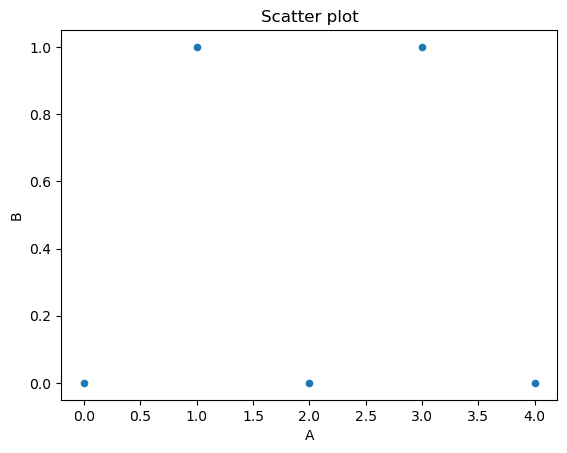

In [33]:
# Plot dataframe directly 
df.plot.scatter(x='A', y='B')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Scatter plot')
plt.show()


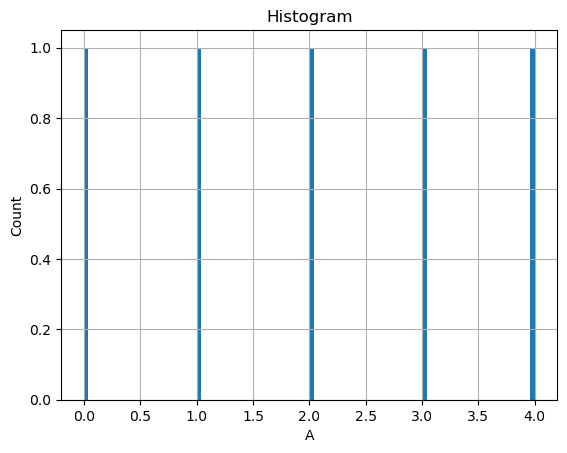

In [36]:
# Histogram
df['A'].hist(bins=100)
plt.xlabel('A')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

### Subfigures - three subfigures 

In [ ]:
# Create a figure with three subfigures 
fig = plt.figure(figsize=(8,4))
axs = fig.subplots(1, 3)

axs[0].bar(df.sort_index, df['label1'], label='label1')
axs[0].legend()
axs[0].set_ylabel('label1')

axs[1].bar(df.index, df['label2'], label='label2')
axs[1].legend()
axs[1].set_ylabel('label2')

axs[2].bar(df.index, df['label3'], label='label3')
axs[2].legend()
axs[2].set_ylabel('label3')

fig.tight_layout()
for ax in axs: 
    ax.set_xlabel('Year')


### CCDF

In [ ]:
# CCDF from graph
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)
print("nodes", len(G.nodes()))
print("edges", len(G.edges()))

sns.ecdfplot(list(dict(G.degree()).values()), complementary=True)
plt.xscale("log")
plt.axvline(10)
plt.axhline(0.4)
plt.title("Complementary CDF")
plt.xlabel("Degree centrality")
plt.show()

## Supervised machine learning

### Preprocessing

In [ ]:
# One hot encoding
X =  pd.get_dummies(pokemon_features[pokemon_features.columns])

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [ ]:
# Min max scaler - Scaling
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [ ]:
# Standard scaler - Scaling
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

### Algorithms

#### Linear regression

In [ ]:
# Linear Regression
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it
lin_reg.coef_ # Coefficient values for each attribute

lr = LinearRegression()
# Function for cross validation
predicted = cross_val_predict(lr, X, y, cv=5)


#### Logistic Regression

In [64]:
logistic = LogisticRegression(solver='lbfgs')
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")



logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X, y)
logistic.predict([[25, 100, 0, 1]])
logistic.predict_proba([[25, 100, 0, 1]])

NameError: name 'X' is not defined

In [ ]:
# Logistic regression
import statsmodels.formula.api as smf
merged_df["VOT2"] = (merged_df.VOT == 1).values.astype(int)
smf.logit("VOT2 ~ PP + NN +PN" , data=merged_df).fit().summary()

In [ ]:
clf = LogisticRegressionCV(Cs=[], cv=10, random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :]).shape


#### K Nearest Neighbours - Classification
Distance measures available:
* euclidian
* manhattan
* chebyshev
* minkowski (default)
* wminkowski
* seuclidean
* mahalanobis
* jaccard
* hamming

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.predict([[test_instance]])
knn.predict_proba([[0.9]])

#### Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, random_state=0)
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
        
# Feature importance
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[0:10]], color="r", yerr=std[indices[0:10]], align="center")
plt.xticks(range(10), indices[0:10])
plt.xlim([-1, X.shape[1]])
plt.show()

#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
cross_val_score(dt, iris.data, iris.target, cv=10)

### Evaluation

In [ ]:
# Precision cross cal
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")

In [ ]:
# Recall cross val
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

In [ ]:
# ROC AUC curver, roc auc score
print("Roc score", roc_auc_score(y, y_pred))

### Regularisation

In [ ]:
ridge = Ridge(alpha=6)
predicted_r = cross_val_predict(ridge, X, y, cv=5)

## Unsupervised Learning 

In [ ]:
# Euclidean distance
euc_dist = euclidean(x, y, w=None)

# Cosine distance
cos_dist = cosine(x, y, w=None)

# Jaccard distance
jac_dist = jaccard(x, y, w=None)

In [ ]:
# K means algorithm
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_ # Cluters created
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_ # Centers of the predicted clusters

In [ ]:
# DBSCAN 
dbscan = DBSCAN(eps=3, min_samples=2).fit(X)

## Natural Language Processing

In [ ]:
# Frequent words
word_freq = Counter(words)
common_words = word_freq.most_common()

In [ ]:
# Bigrams
bigram = Phrases(docs, min_count=15)

In [ ]:
# TF-IDF ~ tf idf
tfids_vec = TfidfVectorizer()
X = tfids_vec.fit_transform(corpus)# Corpus : list of strings
print(tfids_vec.get_feature_names())

# Bag of Words - Count vectoriser
bow_vec = CountVectorizer(ngram_range=(2, 2))
X = bow_vec.fit_transform(corpus)
print(bow_vec.get_feature_names())
print(X.toarray())

In [ ]:
vectorizer = TfidfVectorizer( max_features=150, stop_words="english")
X = vectorizer.fit_transform(merged_df_.TXT_PROCESSED.values).toarray()
X2 = np.hstack((X, merged_df_[["PP", "NN", "PN", "N", "P"]].values))
y =  (merged_df_.VOT == 1).values.astype(int)

X_train, X_test, _, _ = train_test_split(merged_df_["TXT_PROCESSED"].values, 
                                                        y, test_size=0.1, random_state=42)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
clf = SGDClassifier(random_state=0, loss=loss_v).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("After split / roc_auc_score (without extra features)", roc_auc_score(y_test, y_pred))
if loss_v != "hinge":
    y_pred = clf.predict_proba(X_test)[:,1]
    print("(with predict_proba)", roc_auc_score(y_test, y_pred))
    
X2_train, X2_test, _, _ = train_test_split(merged_df_[["PP", "NN", "PN", "N", "P"]].values,
                                                    y, test_size=0.1, random_state=42)

X_train = np.hstack((X_train, X2_train))
X_test = np.hstack((X_test, X2_test))

clf = SGDClassifier(random_state=0, loss=loss_v).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("After split / roc_auc_score (without extra features)", roc_auc_score(y_test, y_pred))


In [ ]:
# Latent Semantic Analysis - LSA
lsa = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
lsa.fit(X)
print(lsa.explained_variance_ratio_)
print(lsa.explained_variance_ratio_.sum())
print(lsa.singular_values_)

## Statistics

In [ ]:
# variance
variance = np.var(x)

# Standard Deviation
std = np.std(x)

In [ ]:
# Generate random number 
seed = randint(low, high)

In [ ]:
# Bootstrapping
BF = []

for i in range(200):
    df_sample = merged_df.sample(frac=1, replace=True)
    # A)
    y = (df_sample.VOT.values == 1).astype(int)
    y_pred = (df_sample.PP + df_sample.NN >= df_sample.PN).astype(int)
    
    BF1 = roc_auc_score(y, y_pred)

    # B)
    y = (df_sample.VOT.values == 1).astype(int)
    y_pred = (df_sample.PP >= df_sample.PN).astype(int)
    BF2 = roc_auc_score(y, y_pred)
    
    BF.append(BF1 - BF2)

print("95% CI:", np.quantile( np.array(BF), q=[0.025, 0.975]))

In [ ]:
# Bootstraps - Bootstrapping - list
mean_bootstraps = []
yerrs_list1 = []
yerrs_list2 = []
bootstrap_datasets = []
for bootstrap_dataset in df['attribute'].unique():
    bootstrap_datasets.append(bootstrap_dataset)
    bootstrap_scores = []
    n = 1000
    df = df[df['attribute'] == bootstrap_dataset]
    for i in range(n):
        # Extraction of the sample
        indices_sample = np.random.choice(list(range(len(df))), 
                                          len(df), replace=True)
        df_sample = df.iloc[indices_sample] 
        
        # Bootstrap list
        bootstrap_scores.append(np.mean(df_sample['nr_words']))


    # Computation on the whole dataset
    bootstrap_scores = np.sort(bootstrap_scores)
    mean_bootstrap = np.mean(bootstrap_scores)
    mean_bootstraps.append(mean_bootstrap)
    lower_bootstrap = (bootstrap_scores - mean_bootstrap)[int(n * 0.025)]
    higher_bootstrap = (bootstrap_scores - mean_bootstrap)[int(n * 0.025)]

    yerrs = [(lower_bootstrap), (higher_bootstrap)]
    yerrs_list1.append(yerrs[0])
    yerrs_list2.append(yerrs[1])


yerrs_list = [yerrs_list1, yerrs_list2]
plt.figure(figsize=(25, 8))
# Can change mean and yerrs to array for several barplots
plt.bar(x = list(range(19)), height = mean_bootstraps, yerr=yerrs_list, color='paleturquoise')
plt.xticks(list(range(19)), bootstrap_datasets)
plt.xlim(-0.5, 20.5)
plt.title('')
plt.xlabel('Mean (*) and 95% confidence interval (-)')
plt.ylabel("Mean square error from the bootstrap sampling")
plt.show()

In [ ]:
# Bootstraps - Bootstrapping - One value
bootstrap_scores = []
n = 10000
n_samples = 56
for i in range(n):
    # Extraction of the sample
    indices_sample_1 = np.random.choice(list(range(len(grasses))), 
                                      n_samples, replace=True)
    indices_sample_2 = np.random.choice(list(range(len(rocks))), 
                                      n_samples, replace=True)
    grass_sample = grasses.iloc[indices_sample_1] 
    rock_sample = rocks.iloc[indices_sample_2] 
    
    stat, p = ttest_ind(grass_sample["attack"], rock_sample["attack"], axis=0, 
                        equal_var=True, nan_policy='propagate')
    # Bootstrap list
    bootstrap_scores.append(p)


# Computation on the whole dataset
bootstrap_scores = np.sort(bootstrap_scores)
mean_bootstrap = np.mean(bootstrap_scores)
lower_bootstrap = (bootstrap_scores - mean_bootstrap)[int(n * 0.025)]
higher_bootstrap = (bootstrap_scores - mean_bootstrap)[int(n * 0.025)]

std = np.std(bootstrap_scores)

yerrs = [[lower_bootstrap, mean_bootstrap - std], [higher_bootstrap, mean_bootstrap + std]]

plt.figure(figsize=(10, 8))
# Can change mean and yerrs to array for several barplots
plt.bar(x = [0, 1], height = mean_bootstrap, yerr=yerrs, color='paleturquoise')
plt.xticks([0, 1], ['95% confidence interval', 'STD'])
plt.xlabel('p-value of the t test between the attack value of grass and rock pokemons')
plt.xlim(-0.5, 1.5)
plt.title('Bootstrapped p-Value')
plt.xlabel('Mean (*) and 95% confidence interval (-)')
plt.ylabel("Mean square error from the bootstrap sampling")
plt.show()

## Statistical Tests

In [ ]:
 ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')[source]

In [ ]:
wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided')

## Graph Networks

### Creation of the graph

### Directed graph

In [ ]:
# Import dataframes
nodes = pd.read_csv('data/part-1/nodelist.tsv', sep='\t').set_index('u',drop=True)
edges = pd.read_csv('data/part-1/edgelist.tsv', sep='\t')

# Create a directed network and print the number of nodes and edges
G = nx.from_pandas_edgelist(edges, 'u', 'v',edge_attr='gender', create_using= nx.MultiDiGraph())
print('The network has', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges')

In [ ]:
# Add edges from pandas
G = nx.from_pandas_edgelist(edges, 'Source', 'Target', 
                                  edge_attr=None, create_using = nx.Graph())

# Add nodes from pandas
# add node attributes by passing dictionary of type name -> attribute
nx.set_node_attributes(G, nodes['attributes'].to_dict(), 'attributes' )

### Undirected graph

In [ ]:
# Create a directed network and print the number of nodes and edges
G = nx.from_pandas_edgelist(edges, 'u', 'v',edge_attr='gender', create_using= nx.Graph())
print('The network has', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges')

In [ ]:
# Specifying edge data
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv.gz"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

### Information about the graph

In [ ]:
# Check Nodes
G.nodes()

# Get Information
print(nx.info(G))

# Get number of nodes and edges 
print(G)

In [ ]:
# Print attributes of edges 
list(G.edges(data=True))

# Print attributes of nodes
list(G.nodes(data=True))

In [ ]:
# Extract values from graphs
tmp = sorted(dict(G.degree()).values())

In [ ]:
# Outdegree is the fraction people 
G_ = nx.from_pandas_edgelist(df, 'SRC', 'TGT', ['VOT', 'RES', 'YEA'], create_using=nx.MultiDiGraph)

tmp = sorted(dict(G_.out_degree()).values())

len([t for t in tmp if t >= 11]) / len(tmp)

In [ ]:
# Draw Graph
nx.draw_spring(G, with_labels=True,  alpha = 0.6)

In [ ]:
# Triangles 
cliques = [clique for clique in nx.enumerate_all_cliques(G_2004) if len(clique) == 3]
print('The number of triangles is: ')
number_of_triangles = len((list(cliques)))
number_of_triangles = np.asarray(list(cliques)).shape
print(number_of_triangles[0])

In [ ]:
# Degree distrbution
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='plum')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

In [ ]:
# Graph properties
def describe_graph(G):
    print(nx.info(G))
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))


In [ ]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=0.6, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    plt.figure(figsize=(20, 8))
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='powderblue', node_shape=node_shape)
    plt.axis('off')

In [ ]:
# Sparsity
print("Network sparsity: %.4f" %nx.density(G))

In [ ]:
# Check if connected graph
print(nx.is_connected(G))

In [ ]:
# Number of components
comp = list(nx.connected_components(G))
print('The graph contains', len(comp), 'connected components')

# Largest component
largest_comp = max(comp, key=len)
percentage_lcc = len(largest_comp)/G.number_of_nodes() * 100
print('The largest component has', len(largest_comp), 'nodes', 
      'accounting for %.2f'% percentage_lcc, '% of the nodes') 

In [ ]:
# shortest path
path = nx.shortest_path(G, source="source node", target="target node")


In [ ]:
# Longest short path - diameter of the graph
temp_graph = graph.subgraph(largest_comp)
print("The diameter of the largest connected component is", 
      nx.diameter(lcc_quakerG))
print("The avg shortest path length of the largest connected component is", 
      nx.average_shortest_path_length(lcc_quakerG))

In [ ]:
# Ratio of all possible triangles - Transitivity - Triadic closure
print('%.4f' %nx.transitivity(G))

In [ ]:
# Clustering coefficient
print(nx.clustering(G, ['node1', 'node2']))

In [ ]:
# All pairs shortest path length
all_pairs_shortest_path_length(G)

In [ ]:
# Subgraph
subgraph_node1 = G.subgraph(['Node 1'] + list(G.neighbors('Node 1')))
nx.draw_spring(G, with_labels=True)
nx.draw_circular(G, with_labels=True)

In [ ]:
# Compute degrees and see importance
degrees = dict(G.degree(G.nodes()))
sorted_degree = sorted(degrees.items(), key=itemgetter(1), reverse=True)

# And the top 5 most popular quakers are.. 
for nodeName, degree in sorted_degree[:5]:
    print(nodeName, 'who is', G.node[nondeName]['Role'], 'knows', degree, 'people')

### Degrees

In [ ]:
# Find degree centrality 
degree_centrality_dict = nx.degree_centrality(G)
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality_dict, orient = 'index', columns=['degree_centrality'])
degree_centrality_df

In [ ]:
# Degree Distribution Scatter plot
degree_seq = [d[1] for d in sorted_degree]
degreeCount = collections.Counter(degree_seq)
degreeCount = pd.DataFrame.from_dict( degreeCount, orient='index').reset_index()
fig = plt.figure()
ax = plt.gca()
ax.plot(degreeCount['index'], degreeCount[0], 'o', c='blue', markersize= 4)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.title('Degree distribution for the Quaker network')

In [ ]:
# Degree of Centrality Katz
degrees = dict(G.degree(G.nodes()))

katz = nx.katz_centrality(G)
nx.set_node_attributes(G, katz, 'katz')
sorted_katz = sorted(katz.items(), key=itemgetter(1), reverse=True)

# And the top 5 most popular quakers are.. 
for nodeName, katzc in sorted_katz[:5]:
    print(nodeName, 'who is', G.node[nodeName]['Role'], 'has katz-centrality: %.3f' %katzc)

In [ ]:
# Compute betweenness centrality
betweenness = nx.betweenness_centrality(G)
# Assign the computed centrality values as a node-attribute in your network
nx.set_node_attributes(G, betweenness, 'betweenness')
sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

for nodeName, bw in sorted_betweenness[:5]:
    print(nodeName, 'who is', G.node[nodeName]['Role'], 'has betweeness: %.3f' %bw)
    


In [ ]:
# Degree centrality heatmap
# similar pattern
list_nodes =list(G.nodes())
list_nodes.reverse()   # for showing the nodes with high betweeness centrality 
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.1)
nc = nx.draw_networkx_nodes(G, pos, nodelist=list_nodes, 
                            node_color=[G.nodes[n]["betweenness"] for n in list_nodes], 
                            with_labels=False, alpha=0.8, node_shape = '.')
plt.colorbar(nc)
plt.axis('off')
plt.show()

### Communities

In [ ]:
# Girvan Newman
comp = girvan_newman(G)
it = 0
for communities in itertools.islice(comp, 4):
    it +=1
    print('Iteration', it)
    print(tuple(sorted(c) for c in communities)) 

In [ ]:
# Louvain
partition = community_louvain.best_partition(G)
# add it as an attribute to the nodes
for n in G.nodes:
    G.nodes[n]["louvain"] = partition[n]

In [ ]:
pos = nx.spring_layout(G, k=0.2)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), 
                            node_color=[G.nodes[n]["louvain"] for n in G.nodes], 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

In [ ]:
clusterNode = partition['Node']
# Take all the nodes that belong to James' cluster
members_c = [q for q in G.nodes if partition[q] == clusterNode]
# get info about these quakers
for nodeName in members_c:
    print(nodeName, 'who is', G.node[nodeName]['Role'], 'and died in ',
          G.node[quaker]['Deathdate'])

In [ ]:
# Homophily
# for categorical attributes
nx.attribute_assortativity_coefficient(G, 'Gender')

In [ ]:
nodes.groupby('Gender').size()

In [ ]:
# Check if edge
G.has_edge(a, b)